# Biodiversity in National Parks
## Codecademy Data Scientist Path
## 13.1.1 Biodiversity in National Parks Portfolio Project

## Introduction

The goal of this project is to interpret data from the National Parks Service about endangered species in different parks, particularly around the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

This project scopes, analyzes, prepares, plots data, and seeks to explain the findings from the analysis.

Here are a few questions that this project seeks to answer:

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and its conservation status significant?
4. Which animal is most prevalent, and what is its distribution amongst parks?
5. Which plant is most prevalent, and what is its distribution amongst parks?
6. Do certain parks have higher proportions of species with a conservation status?

**Data sources:**

Both `observations.csv` and `species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It is beneficial to create a project scope whenever a new project is being started.  The scoping process for this project is based on the University of Chicago's [Data Science Project Scoping Guide](http://www.datasciencepublicpolicy.org/home/resources/data-science-project-scoping-guide/).  In accordance with this guide, the four sections below help guide the project's process and progress.  In the first section, we define the project's goals, including the high-level objectives and intentions for this project.  The next section is the data.  Fortunately, for this project, the relevant data is already provided; however, it still must be checked whether project goals can be met with the available data. We must also provide a thorough analysis of the methods and questions that are aligned with the project goals.  Finally, an evaluation of our project helps us draw conclusions and state findings from our analysis.

### Project Goals

In this project, we take the perspective of a biodiversity analyst for the National Parks Service.  NPS wants to ensure the survival of at-risk species in order to maintain the level of biodiversity within their parks.  Therefore, the main objectives as an analyst are to understand the characteristics of the various species, their respective conservation statuses, and their relationship to the national parks.  Some questions we pose include:

1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and its conservation status significant?
4. Which animal is most prevalent, and what is its distribution amongst parks?
5. Which plant is most prevalent, and what is its distribution amongst parks?
6. Do certain parks have higher proportions of species with a conservation status?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species, and the other has observations of species with park locations.  We will use this data to analyze the goals of the project. 

### Analysis

In this section, we employ descriptive statistics and data visualization techniques to better understand the data.  We also use statistical inference to test whether the observed values are statistically significant.  Some of the key metrics that we compute include: 

1. Distributions,
2. counts,
3. relationship between species,
4. conservation status of species, and
5. observations of species in parks. 

### Evaluation

Lastly, it is a good idea to revisit the original goals and check whether the output of the analysis corresponds to the questions first set forth (in the goals section).  This section also reflects on what was learned through the process and whether any of the questions were unable to be answered.  The section could also include limitations to analysis or whether any of the analysis could have been done using different methodologies.

## Import Python Modules

First, import the primary modules necessary for this project:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency as chi_square

from matplotlib import pyplot as plt
import seaborn as sns

from itertools import chain
import string

## Load the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`.  Once loaded as `DataFrames` the data can be explored and visualized with Python.

The project package contains two CSV files:

`species_info.csv` - contains data about different species and their conservation status.  This dataset has the following columns of data:
- **category** - the class of animal (the definition of class is not rigorous)
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status

`observations.csv` - holds recorded sightings of different species at several national parks for the past seven days.  This dataset has the following columns of data:
- **scientific_name** - the scientific name of each species
- **park_name** - the park where each species was found
- **observations** - the number of times each species was observed at the park

In the next steps, we read in `observations.csv` and `species_info.csv` as DataFrames called `observations` and `species`, respectively. Then, we check the contents of each newly created DataFrames with `.head()`.

In [2]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Data Characteristics

Next, we inspect the dimensions of each DataFrame with `.shape`.

In [4]:
print('Shape of observations: {}'.format(observations.shape))
print('Shape of species: {}'.format(species.shape))

Shape of observations: (23296, 3)
Shape of species: (5824, 4)


The `observations` DataFrame has 23,296 rows and 3 columns, while the `species` DataFrame has 5,824 rows with 4 columns.

## Explore the Data

Now, we can explore the `observations` data more in depth.  First, we will use the `park_name` column to find the number of distinct parks in the data.

In [5]:
print('Number of parks: {}'.format(observations.park_name.nunique()))
print('Parks: {}'.format(observations.park_name.unique().tolist()))

Number of parks: 4
Parks: ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']


There are only four of the 62 national parks in this dataset.

We can also check the number of unique species by using the `scientific_name` column.

In [6]:
print('Number of species observed: {}'.format(observations.scientific_name.nunique()))

Number of species observed: 5541


There are 5,541 distinct species observed in this dataset.  Later, we will compare this number to the number of distinct species in the `species` dataset.

Finally, we should find the total number of observations by summing the `observations` row.

In [7]:
print('Total number of observations: {}'.format(observations.observations.sum()))

Total number of observations: 3314739


In the past seven days, the parks logged a whopping 3,314,739 sightings!

Now, we can explore the `species` dataset.  We can use the `scientific_name` column to get the distinct number of species.

In [8]:
print('Number of species: {}'.format(species.scientific_name.nunique()))

Number of species: 5541


The `species` dataset contains 5,541 unique species.  This is the same number as the `observations` dataset.

Next, we can find the number of distinct classes by using the `category` column.

In [9]:
print('Number of classes: {}'.format(species.category.nunique()))
print('Classes: {}'.format(species.category.unique().tolist()))

Number of classes: 7
Classes: ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


In [10]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

Here, we see that there are seven different classes of species, including both animals and plants.

We can dive a little deeper and see the counts of each `category` in the dataset.

In [11]:
species[['category', 'scientific_name']].groupby("category").count().rename(columns={'scientific_name': 'count'}).sort_values('count', ascending=False).reset_index()

,category,count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


Vascular plants have by far the largest share of species with 4,470, while reptiles are the fewest with 79.

Another column we can explore is `conservation_status`.

In [12]:
print('Number of conservation statuses: {}'.format(species.conservation_status.nunique()))
print('Conservation statuses: {}'.format(species.conservation_status.unique().tolist()))

Number of conservation statuses: 4
Conservation statuses: [nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


The column has 4 categories:  Species of Concern, Endangered, Threatened, and In Recovery, as well as `nan` values.

The `conservation_status` column has several possible values:
- `'Species of Concern'`: declining or appear to be in need of conservation
- `'Threatened'`: vulnerable to endangerment in the near future
- `'Endangered'`: seriously at risk of extinction
- `'In Recovery'`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

Let's clean the `conservation_status` column to replace the `nan` values with `'No Intervention'` to indicate that these species have no conservation status.

Note:  In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [13]:
species.fillna('No Intervention', inplace=True)

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [14]:
species[['conservation_status', 'scientific_name']].groupby("conservation_status").count().rename(columns={'scientific_name': 'count'}).sort_values('count', ascending=False).reset_index()

,conservation_status,count
0,No Intervention,5633
1,Species of Concern,161
2,Endangered,16
3,Threatened,10
4,In Recovery,4


## Analysis

This section analyzes the data after initial exploration.

#### Distributions

To start, we can investigate the different categories that are nested in the `conservation_status` column other than those that do not require an intervention.  There is both a table and chart to explore below.

In this section, we try to answer the first question of the project goals:
> What is the distribution of conservation status for species?

In [15]:
conservation_categories = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name']\
    .count()

conservation_categories.unstack()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


For those in the `Endangered` status, 7 were mammals and 4 were birds.  For species with `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

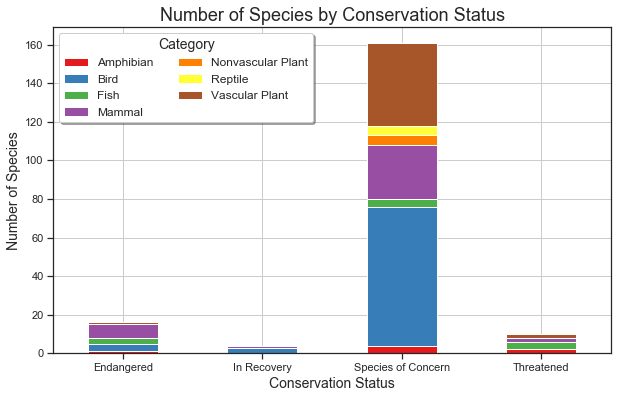

In [16]:
sns.set(style='ticks', rc={"axes.grid":True}, palette='Set1')

ax = conservation_categories.unstack().plot(kind='bar', figsize=(10, 6), stacked=True)

ax.set_title('Number of Species by Conservation Status', size=18)
ax.set_xlabel('Conservation Status', size=14)
ax.set_xticklabels(conservation_categories.reset_index().conservation_status.unique().tolist(), rotation=0)
ax.set_ylabel('Number of Species', size=14)
ax.legend(title='Category', title_fontsize=14, fontsize=12, shadow=True, loc=2, ncol=2)

plt.show()

Looking at the chart above, we notice that the conservation status with the most species is `'Species of Concern'` by far, containing mostly birds, mammals, and vascular plants.  On the other hand, the conservation status with the fewest species is `'In Recovery'`.

#### In Conservation

The next section seeks to answer the second question from our project goals:
> Are certain types of species more likely to be endangered?

We can add a new column to `species` called `is_protected` to differentiate species with and without a conservation status.

In [17]:
species['is_protected'] = species.conservation_status != 'No Intervention'

species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


Having created the new column, we can now group by `category` and `is_protected` similarly to the procedure in the previous section.

In [18]:
category_counts = species.groupby(['category', 'is_protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_protected', index='category', values='scientific_name')\
    .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


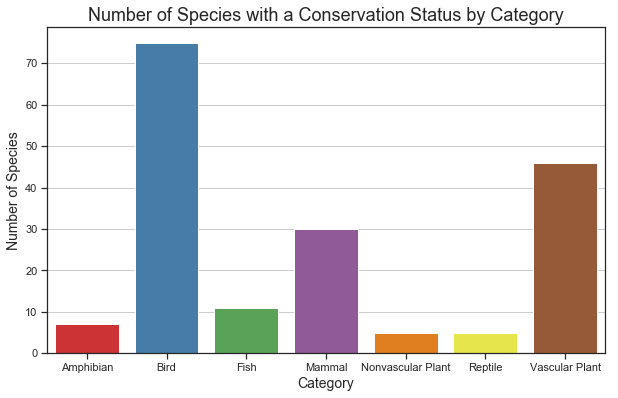

In [19]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=category_counts, x='category', y='protected', palette='Set1')

ax.set_title('Number of Species with a Conservation Status by Category', size=18)
ax.set_xlabel('Category', size=14)
ax.set_ylabel('Number of Species', size=14)

plt.show()

Again, it is clear to see that birds, mammals, and vascular plants are the most protected classes.

Absolute numbers are not always the most useful statistic when comparing different sample sizes, so it is important to calculate the rate of protection that each `category` exhibits in the data.

In [20]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


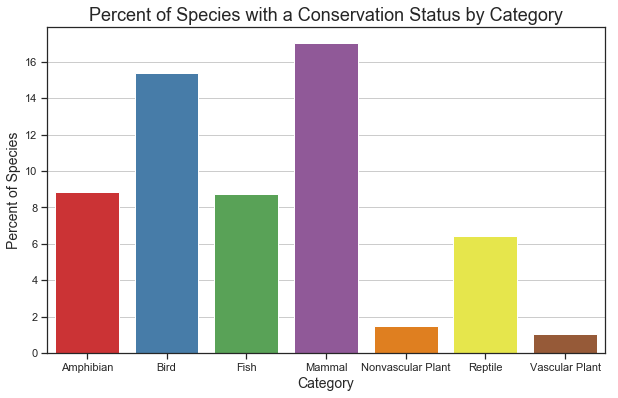

In [21]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=category_counts, x='category', y='percent_protected', palette='Set1')

ax.set_title('Percent of Species with a Conservation Status by Category', size=18)
ax.set_xlabel('Category', size=14)
ax.set_ylabel('Percent of Species', size=14)

plt.show()

Based on this data, birds and mammals are the most likely class to be protected at ~15% and ~17%, respectively.  Vascular plants only have a protection rate of about 1%, which highlights the importance of comparing the protection rates in addition to the absolute numbers.

Now, it is a natural next step to perform a similar analysis on the group of species most at risk of becoming extinct: the Endangered designation.

We start by creating an `is_endangered` column.

In [22]:
endangered = species

endangered['is_endangered'] = endangered.conservation_status == 'Endangered'

endangered.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_endangered
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Now, we call `.groupby` `category` and `is_endangered`.

In [23]:
endangered_counts = endangered.groupby(['category', 'is_endangered'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='is_endangered', index='category', values='scientific_name')\
    .reset_index()

endangered_counts = endangered_counts.fillna(0)

endangered_counts.columns = ['category', 'not_endangered', 'endangered']

endangered_counts

,category,not_endangered,endangered
0,Amphibian,78.0,1.0
1,Bird,484.0,4.0
2,Fish,122.0,3.0
3,Mammal,171.0,6.0
4,Nonvascular Plant,333.0,0.0
5,Reptile,78.0,0.0
6,Vascular Plant,4261.0,1.0


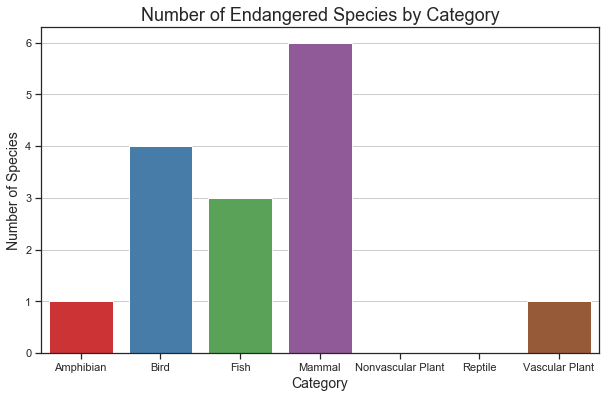

In [24]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=endangered_counts, x='category', y='endangered', palette='Set1')

ax.set_title('Number of Endangered Species by Category', size=18)
ax.set_xlabel('Category', size=14)
ax.set_ylabel('Number of Species', size=14)

plt.show()

It is clear that Mammals, Birds, and Fish have the most endangered species (albeit very few).

What percent of species are endangered, however?

In [25]:
endangered_counts['percent_endangered'] = endangered_counts.endangered / \
                                      (endangered_counts.endangered + endangered_counts.not_endangered) * 100

endangered_counts

,category,not_endangered,endangered,percent_endangered
0,Amphibian,78.0,1.0,1.265823
1,Bird,484.0,4.0,0.819672
2,Fish,122.0,3.0,2.400000
3,Mammal,171.0,6.0,3.389831
4,Nonvascular Plant,333.0,0.0,0.000000
5,Reptile,78.0,0.0,0.000000
6,Vascular Plant,4261.0,1.0,0.023463


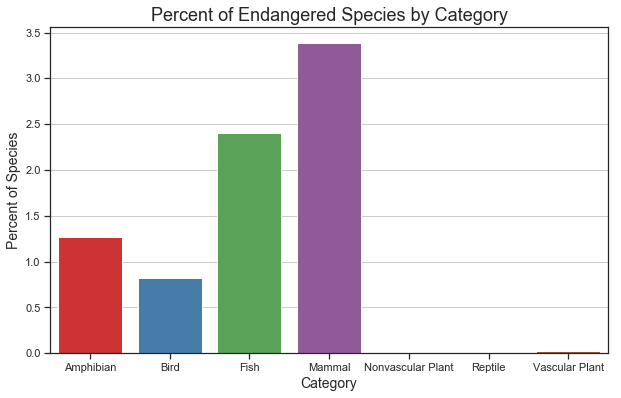

In [26]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=endangered_counts, x='category', y='percent_endangered', palette='Set1')

ax.set_title('Percent of Endangered Species by Category', size=18)
ax.set_xlabel('Category', size=14)
ax.set_ylabel('Percent of Species', size=14)

plt.show()

Again, Mammals and Fish have high rates of endangerment with ~3.4% and ~2.4%, respectively.

#### Statistical Significance

According to the third question in the project goals, this section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates:
> Are the differences between species and their conservation status significant?

In order to run a chi-squared test, a contingency table will need to be created.  The contingency table should look like this:

<table>
    <tr>
        <td></td>
        <td>Protected</td>
        <td>Not Protected</td>
    </tr>
    <tr>
        <td>Class 1</td>
        <td>?</td>
        <td>?</td>
    </tr>
    <tr>
        <td>Class 2</td>
        <td>?</td>
        <td>?</td>
    </tr>
</table>

The first test is called `contingency1` and must be filled with the correct numbers for mammals and birds.

H<sub>0</sub>:  There is **no association** between the protection rates of mammals and birds.  
H<sub>a</sub>:  There is an **association** between the protection rates of mammals and birds.

Here is the contingency table for this test:

<table>
    <tr>
        <td></td>
        <td>Protected</td>
        <td>Not Protected</td>
    </tr>
    <tr>
        <td>Mammal</td>
        <td>30</td>
        <td>146</td>
    </tr>
    <tr>
        <td>Bird</td>
        <td>75</td>
        <td>413</td>
    </tr>
</table>

We set a standard significance level (alpha) of 0.05 in order to reject the null hypothesis.

According to the SciPy documentation, `chi2_contingency` (aliased as `chi_square`) returns four values:
- `chi2`:  the test statistic
- `p`:  the p-value of the test
- `dof`:  degrees of freedom
- `expected` (same shape as observed):  the expected frequencies, based on the marginal sums of the table

We will only concern ourselves with `p` since that will determine whether there is any significant relationship in our data to reject the null hypothesis.

In [27]:
contingency1 = [[30, 146],
                [75, 413]]

chi2, pval, dof, exp = chi_square(contingency1)
print('Chi-Squared: {}'.format(chi2))
print('P-Value: {}'.format(pval))
print('Degrees of Freedom: {}'.format(dof))
print('Expected Frequencies:\n{}'.format(exp))

Chi-Squared: 0.1617014831654557
P-Value: 0.6875948096661336
Degrees of Freedom: 1
Expected Frequencies:
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


For the p-value retrieved from this test, the value of 0.69 is much larger than 0.05.  Therefore, in the case of mammals and birds, we cannot reject the null hypothesis, so there is no significant relationship between them (i.e., the variables are independent).

The next test is called `contingency2` and must be filled with the correct numbers for reptiles and mammals.

H<sub>0</sub>:  There is **no association** between the protection rates of mammals and reptiles.  
H<sub>a</sub>:  There is an **association** between the protection rates of mammals and reptiles.

Here is the contingency table for this test:

<table>
    <tr>
        <td></td>
        <td>Protected</td>
        <td>Not Protected</td>
    </tr>
    <tr>
        <td>Reptile</td>
        <td>5</td>
        <td>73</td>
    </tr>
    <tr>
        <td>Mammal</td>
        <td>30</td>
        <td>146</td>
    </tr>
</table>

Again, we set a significance level of 0.05 in order to reject the null hypothesis.

In [28]:
contingency2 = [[5, 73],
                [30, 146]]

chi2, pval, dof, exp = chi_square(contingency2)
print('Chi-Squared: {}'.format(chi2))
print('P-Value: {}'.format(pval))
print('Degrees of Freedom: {}'.format(dof))
print('Expected Frequencies:\n{}'.format(exp))

Chi-Squared: 4.289183096203645
P-Value: 0.03835559022969898
Degrees of Freedom: 1
Expected Frequencies:
[[ 10.7480315  67.2519685]
 [ 24.2519685 151.7480315]]


From this test, the p-value of 0.04 is less than 0.05.  Therefore, in the case of reptiles and mammals, we can reject the null hypothesis, so there is a significant relationship between them (i.e., the variables are not independent).

#### Animal Species in Parks

The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.  This is in accordance with the fourth question from the project goals:

> Which animal is most prevalent and what is their distribution amongst parks?

The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset.  The data will be need to be split up into individual names.  We will write a function `remove_punctuations` to pass into the `.apply` method for our `species` DataFrame.

Within the `get_word_counts` function, we can continue the process of finding the most prevalent animals in the dataset.  We should clean up duplicate words in each row since they should not be counted more than once per species.  Then, we can collapse the words into one list for easier use.  Finally, the data is ready to count the number of occurrences of each word.

In [29]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [30]:
def get_word_counts(df, *species_category):
    common_names = []
    for category in species_category:
        common_names += df[df.category == category]\
            .common_names\
            .apply(remove_punctuations)\
            .str.split().tolist()
    
    clean_rows = []

    for item in common_names:
        item = list(dict.fromkeys(item))
        clean_rows.append(item)
        
    res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
    
    words_counted = []

    for i in res:
        x = res.count(i)
        words_counted.append((i, x))

    word_counts = pd.DataFrame(words_counted, columns=['word', 'count']).drop_duplicates().sort_values('count', ascending=False)
    
    return word_counts

In our data, we consider animals to be all categories except `'Vascular Plant'` and `'Nonvascular Plant'`.

In [31]:
animal_word_counts = get_word_counts(species, 'Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile')

animal_word_counts.head(10)

,word,count
214,Warbler,59
7,Northern,53
48,Salamander,41
1,Eastern,39
0,American,37
269,Common,31
25,Western,31
414,Sparrow,29
1529,Snake,28
16,Mountain,23


From this analysis, we have that `'Warbler'` occurred the most in our `species` data at 59 times.  This simply means that the most frequent common name for non-plant species in this data is `'Warbler'`.

The primary issue arising from this analysis is that simply finding the most frequent common name in the `species` data does not necessarily mean that this species group is the most frequently observed in the parks.

The first step in solving this problem will be to run the same word count analysis on the `observations` data.  We can add a `common_names` column to our `observations` DataFrame by mapping each `scientific_name` in the `observations` DataFrame to its associated `common_names` in the `species` DataFrame.

First, we create lists from each necessary column in the `observations` DataFrame.  Then, we can use a dictionary comprehension to map each `scientific_name` to a set of `column_names` or a `category`.

In [32]:
scientific_names = species.scientific_name.tolist()
common_names = species.common_names.tolist()
categories = species.category.tolist()
conservation_statuses = species.conservation_status.tolist()
is_protected = species.is_protected.tolist()

names_dict = {sci: common for sci, common in zip(scientific_names, common_names)}
categories_dict = {sci: cat for sci, cat in zip(scientific_names, categories)}
conservation_statuses_dict = {sci: cat for sci, cat in zip(scientific_names, conservation_statuses)}
is_protected_dict = {sci: cat for sci, cat in zip(scientific_names, is_protected)}

After creating new columns to `observations` by calling `.map` on our dictionaries, we can reorder the columns so that the DataFrame looks more like the `species` DataFrame.

In [33]:
observations['common_names'] = observations.scientific_name.map(names_dict)
observations['category'] = observations.scientific_name.map(categories_dict)
observations['conservation_status'] = observations.scientific_name.map(conservation_statuses_dict)
observations['is_protected'] = observations.scientific_name.map(is_protected_dict)

observations = observations[['category', 'scientific_name', 'common_names', 'park_name', 'observations', 'conservation_status', 'is_protected']]

observations.head()

,category,scientific_name,common_names,park_name,observations,conservation_status,is_protected
0,Vascular Plant,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Great Smoky Mountains National Park,68,No Intervention,False
1,Mammal,Neovison vison,American Mink,Great Smoky Mountains National Park,77,No Intervention,False
2,Vascular Plant,Prunus subcordata,Klamath Plum,Yosemite National Park,138,No Intervention,False
3,Vascular Plant,Abutilon theophrasti,Velvetleaf,Bryce National Park,84,No Intervention,False
4,Vascular Plant,Githopsis specularioides,Common Bluecup,Great Smoky Mountains National Park,85,No Intervention,False


Again, we can run our analysis of word counts for animals.

In [34]:
animal_word_counts = get_word_counts(observations, 'Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile')

animal_word_counts.head(10)

,word,count
870,Warbler,236
16,Northern,216
3,Salamander,164
33,American,164
0,Eastern,152
37,Western,120
852,Sparrow,116
5404,Snake,112
879,Common,108
145,Mountain,92


While the counts of each word have increased, `'Warbler'` still remains the most common word among animals.

The next step in determining the most commonly observed animal is to sum the `observations` corresponding to the `word_counts` that contain each `word`.  The goal is to return a similar DataFrame with an added column containing the number of `observations` corresponding to each `word`.

In [35]:
animal_observations = observations.loc[(observations.category == 'Amphibian') |\
                                       (observations.category == 'Bird') |\
                                       (observations.category == 'Fish') |\
                                       (observations.category == 'Mammal') |\
                                       (observations.category == 'Reptile')]

In [36]:
observations_by_word = []

for word in animal_word_counts.word:
    obs = animal_observations.observations[animal_observations.common_names.str.contains(word)].sum()
    observations_by_word.append(obs)

In [37]:
observations_by_word[:5]

[33394, 29580, 25108, 22892, 21805]

In [38]:
animal_word_counts['observations'] = observations_by_word

animal_word_counts.sort_values('observations', ascending=False).head(10)

,word,count,observations
870,Warbler,236,33394
6476,North,8,30568
16,Northern,216,29580
57,Red,68,28485
893,Black,68,26899
3,Salamander,164,25108
33,American,164,22892
0,Eastern,152,21805
74,Yellow,28,17694
187,Wood,20,17120


Finally, we can confirm that the `'Warbler'` was the most observed animal in the four National Parks over the past seven days with 33,394 observations.

Knowing that the `'Warbler'` is the most observed animal, let's see how many were observed in each National Park.

In [39]:
warbler_observations = animal_observations[animal_observations.common_names.str.contains('Warbler')].groupby('park_name').sum().reset_index()

warbler_observations['animal_observations'] = animal_observations.groupby('park_name').sum().reset_index().observations
warbler_observations['non_warbler_observations'] = warbler_observations.animal_observations - warbler_observations.observations
warbler_observations['percent_observations'] = warbler_observations.observations / warbler_observations.animal_observations * 100

warbler_observations = warbler_observations[['park_name', 'observations', 'non_warbler_observations', 'animal_observations', 'percent_observations']]
warbler_observations = warbler_observations.rename(columns={'observations': 'warbler_observations'})

warbler_observations

,park_name,warbler_observations,non_warbler_observations,animal_observations,percent_observations
0,Bryce National Park,5760,94190,99950,5.762881
1,Great Smoky Mountains National Park,4435,68909,73344,6.046848
2,Yellowstone National Park,14487,233127,247614,5.850638
3,Yosemite National Park,8712,139376,148088,5.882988


It seems that Yellowstone National Park has the highest absolute number of warbler observations at 14,487.  On the other hand, Great Smoky Mountains National Park has the highest rate of warblers among observed animals at 6.05%

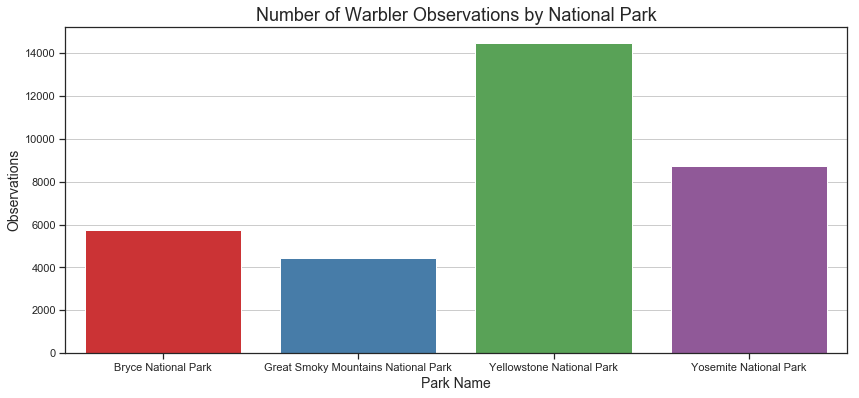

In [40]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=warbler_observations, x='park_name', y='warbler_observations', palette='Set1')

ax.set_title('Number of Warbler Observations by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Observations', size=14)

plt.show()

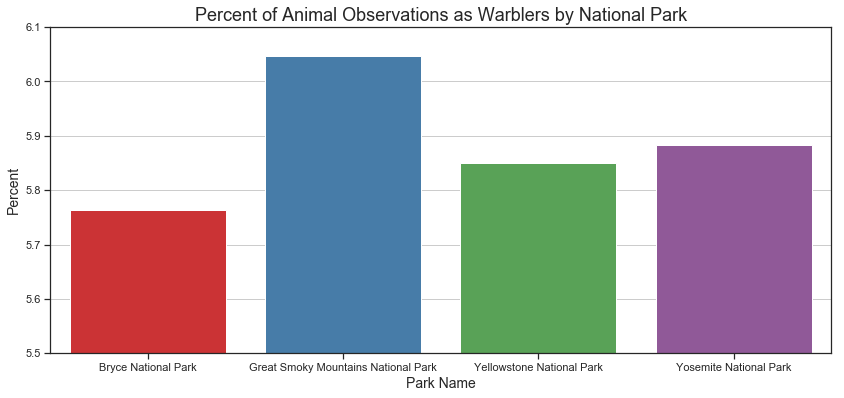

In [41]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=warbler_observations, x='park_name', y='percent_observations', palette='Set1')

ax.set_title('Percent of Animal Observations as Warblers by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Percent', size=14)

ax.set_ylim(5.5, 6.1)

plt.show()

Let's return to the hypothesis testing from before and run a chi-squared test for independence to see whether the observation rates for warblers at the national parks are independent of one another.

This test is called `contingency3` and must be filled with the correct warbler observation numbers for each national park.

H<sub>0</sub>:  There is **no association** between the national parks and the observation rate of warblers.  
H<sub>a</sub>:  There is an **association** between the national parks and the observation rate of warblers.

Here is the contingency table for this test:

<table>
    <tr>
        <td></td>
        <td>Warbler<br>
            Observations</td>
        <td>Non-Warbler<br>
            Observations</td>
    </tr>
    <tr>
        <td>Bryce National Park</td>
        <td>5,760</td>
        <td>94,190</td>
    </tr>
    <tr>
        <td>Great Smoky Mountains National Park</td>
        <td>4,435</td>
        <td>68,909</td>
    </tr>
    <tr>
        <td>Yellowstone National Park</td>
        <td>14,487</td>
        <td>233,127</td>
    </tr>
    <tr>
        <td>Yosemite National Park</td>
        <td>8,712</td>
        <td>139,376</td>
    </tr>
</table>

We set a significance level of 0.05 for this test.

In [42]:
contingency3 = [[5760, 94190],
                [4435, 68909],
                [14487, 233127],
                [8712, 139376]]

chi2, pval, dof, exp = chi_square(contingency3)
print('Chi-Squared: {}'.format(chi2))
print('P-Value: {}'.format(pval))
print('Degrees of Freedom: {}'.format(dof))
print('Expected Frequencies:\n{}'.format(exp))

Chi-Squared: 6.440170506882721
P-Value: 0.09205213051347098
Degrees of Freedom: 3
Expected Frequencies:
[[  5865.99958523  94084.00041477]
 [  4304.51099129  69039.48900871]
 [ 14532.30236416 233081.69763584]
 [  8691.18705931 139396.81294069]]


This test has a p-value of 0.092 which does not meet the significance threshold of 0.05 or lower.  Therefore, we cannot reject the null hypothesis, and we conclude that there is no significant relationship between the national parks and the observation rate of warblers.

#### Plant Species in Parks

The next set of analysis follows the same process as the previous section and tries to answer the fifth question from the project goals:

> Which plant is most prevalent and what is its distribution amongst parks?

Now, let's run the same analysis on plants (i.e., vascular and nonvascular plants).

In [43]:
plant_word_counts = get_word_counts(observations, 'Vascular Plant', 'Nonvascular Plant')
plant_word_counts.head(10)

,word,count
3515,Moss,1144
225,Sedge,900
8,Common,700
57,Grass,568
195,Mountain,504
12,Wild,400
26,White,380
166,Yellow,348
390,Western,332
32,American,272


In [44]:
plant_observations = observations.loc[(observations.category == 'Vascular Plant') |\
                                       (observations.category == 'Nonvascular Plant')]

In [45]:
observations_by_word = []

for word in plant_word_counts.word:
    obs = plant_observations.observations[plant_observations.common_names.str.contains(word)].sum()
    observations_by_word.append(obs)

In [46]:
observations_by_word[:5]

[167043, 134629, 100139, 97364, 83946]

In [47]:
plant_word_counts['observations'] = observations_by_word

plant_word_counts.sort_values('observations', ascending=False).head(10)

,word,count,observations
1593,A,104,310155
3515,Moss,1144,167043
978,St,60,138754
225,Sedge,900,134629
8,Common,700,100139
1457,Gras,4,97919
57,Grass,568,97364
14994,Mount,12,85144
195,Mountain,504,83946
496,Blue,248,81212


For plants, we have that `'Moss'` was the most observed in the four National Parks over the past seven days with 167,043 observations.  While `'A'` is higher than `'Moss'`, it is only a part of speech (indefinite article) and does not represent an actual plant type.

Let's compare the number of moss observations and the rate of observation among plants for each national park.

In [48]:
moss_observations = plant_observations[plant_observations.common_names.str.contains('Moss')].groupby('park_name').sum().reset_index()

moss_observations['plant_observations'] = plant_observations.groupby('park_name').sum().reset_index().observations
moss_observations['non_moss_observations'] = moss_observations.plant_observations - moss_observations.observations
moss_observations['percent_observations'] = moss_observations.observations / moss_observations.plant_observations * 100

moss_observations = moss_observations[['park_name', 'observations', 'non_moss_observations', 'plant_observations', 'percent_observations']]
moss_observations = moss_observations.rename(columns={'observations': 'moss_observations'})

moss_observations

,park_name,moss_observations,non_moss_observations,plant_observations,percent_observations
0,Bryce National Park,28960,447115,476075,6.083075
1,Great Smoky Mountains National Park,21638,336838,358476,6.036108
2,Yellowstone National Park,72783,1123165,1195948,6.085800
3,Yosemite National Park,43662,671582,715244,6.104490


Yellowstone National Park has the highest number of moss observations with 1,195,948.  Yosemite National Park is the park with the highest observation rate at 6.10%.

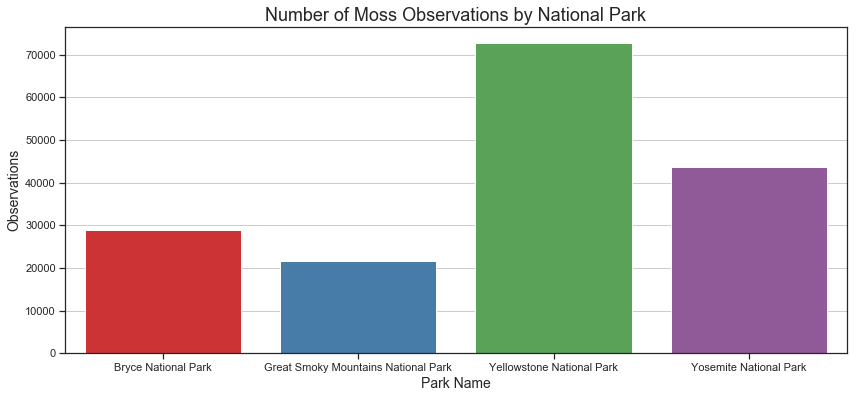

In [49]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=moss_observations, x='park_name', y='moss_observations', palette='Set1')

ax.set_title('Number of Moss Observations by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Observations', size=14)

plt.show()

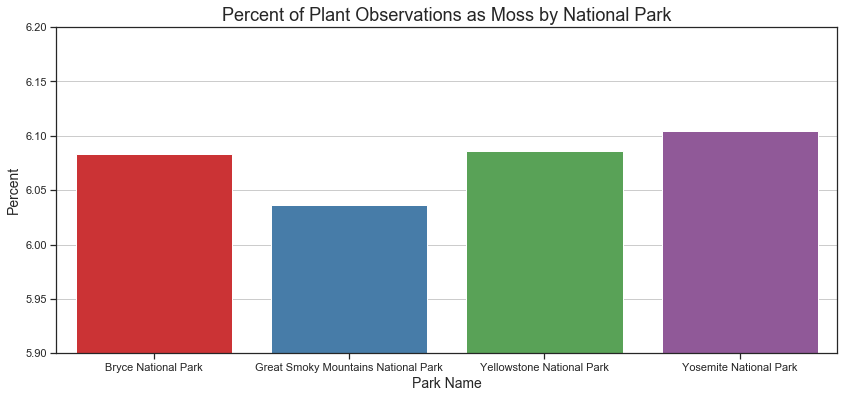

In [50]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=moss_observations, x='park_name', y='percent_observations', palette='Set1')

ax.set_title('Percent of Plant Observations as Moss by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Percent', size=14)

ax.set_ylim(5.9, 6.2)

plt.show()

We can also perform a chi-squared test for independence on the moss data.

This test is called `contingency4` and must be filled with the correct moss observation numbers for each National Park.

H<sub>0</sub>:  There is **no association** between the national parks and the observation rate of moss.  
H<sub>a</sub>:  There is an **association** between the national parks and the observation rate of moss.

Here is the contingency table for this test:

<table>
    <tr>
        <td></td>
        <td>Moss<br>
            Observations</td>
        <td>Non-Moss<br>
            Observations</td>
    </tr>
    <tr>
        <td>Bryce National Park</td>
        <td>28,960</td>
        <td>447,115</td>
    </tr>
    <tr>
        <td>Great Smoky Mountains National Park</td>
        <td>21,638</td>
        <td>336,838</td>
    </tr>
    <tr>
        <td>Yellowstone National Park</td>
        <td>72,783</td>
        <td>1,123,165</td>
    </tr>
    <tr>
        <td>Yosemite National Park</td>
        <td>43,662</td>
        <td>671,582</td>
    </tr>
</table>

We set a significance level of 0.05 for this test.

In [51]:
contingency4 = [[28960, 447115],
                [21638, 336838],
                [72783, 1123165],
                [43662, 671582]]

chi2, pval, dof, exp = chi_square(contingency4)
print('Chi-Squared: {}'.format(chi2))
print('P-Value: {}'.format(pval))
print('Degrees of Freedom: {}'.format(dof))
print('Expected Frequencies:\n{}'.format(exp))

Chi-Squared: 1.971690798614678
P-Value: 0.5783031271321715
Degrees of Freedom: 3
Expected Frequencies:
[[  28963.01519297  447111.98480703]
 [  21808.63484601  336667.36515399]
 [  72757.99000999 1123190.00999001]
 [  43513.35995102  671730.64004898]]


The p-value of 0.578 is much higher than the significance level of 0.05.  Thus, we cannot reject the null hypothesis and conclude that there is no significant relationship between the national parks and the observation rate of moss.

Finally, let's compare the total number of protected species and the protection rates in each park.

In [52]:
conservation_counts = observations.groupby(['park_name', 'conservation_status'])\
    .observations.sum()\
    .unstack()\
    .reset_index()

protected_counts = observations.groupby(['park_name', 'is_protected'])\
    .observations.sum()\
    .unstack()\
    .reset_index()

protected_counts.columns = ['park_name', 'Not Protected', 'Protected']

conservation_counts = conservation_counts[['park_name', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery', 'No Intervention']]

conservation_counts['Protected'] = protected_counts['Protected']
conservation_counts['Total'] = conservation_counts['No Intervention'] + conservation_counts['Protected']
conservation_counts['Percent Protected'] = conservation_counts['Protected'] / conservation_counts['Total'] * 100

conservation_counts = conservation_counts[['park_name', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery', 'Protected', 'No Intervention', 'Total', 'Percent Protected']]

conservation_counts

conservation_status,park_name,Species of Concern,Threatened,Endangered,In Recovery,Protected,No Intervention,Total,Percent Protected
0,Bryce National Park,14925,591,489,258,16263,559762,576025,2.823315
1,Great Smoky Mountains National Park,10314,440,334,189,11277,420543,431820,2.611505
2,Yellowstone National Park,35789,1459,1228,559,39035,1404527,1443562,2.704075
3,Yosemite National Park,21551,849,747,386,23533,839799,863332,2.725834


Yellowstone National Park has the highest total number of protected species with 39,035.  Bryce National Park has the highest protection rate at 2.82% protected.

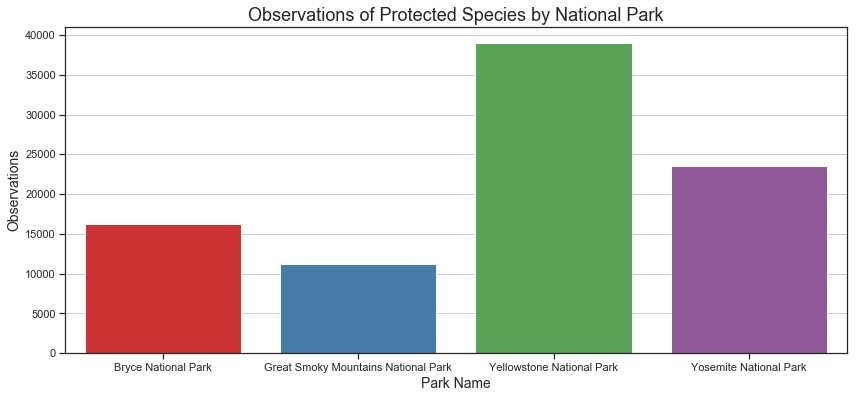

In [53]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=conservation_counts, x='park_name', y='Protected', palette='Set1')

ax.set_title('Observations of Protected Species by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Observations', size=14)

plt.show()

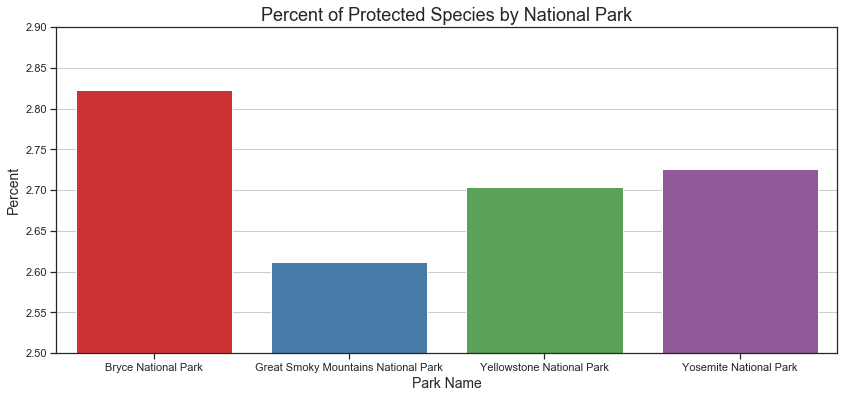

In [54]:
sns.set(style='ticks', rc={"axes.grid":True})

f, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(data=conservation_counts, x='park_name', y='Percent Protected', palette='Set1')

ax.set_title('Percent of Protected Species by National Park', size=18)
ax.set_xlabel('Park Name', size=14)
ax.set_ylabel('Percent', size=14)

ax.set_ylim(2.5, 2.9)

plt.show()

Let's run one final chi-squared test for independence on the protection rates of all species.

This test is called `contingency5` and must be filled with the correct protection numbers for each national park.

H<sub>0</sub>:  There is **no association** between the national parks and the protection rate of all species.  
H<sub>a</sub>:  There is an **association** between the national parks and the protection rate of all species.

Here is the contingency table for this test:

<table>
    <tr>
        <td></td>
        <td><br>
            Protected</td>
        <td>No Intervention<br>
            (Not Protected)</td>
    </tr>
    <tr>
        <td>Bryce National Park</td>
        <td>16,263</td>
        <td>559,762</td>
    </tr>
    <tr>
        <td>Great Smoky Mountains National Park</td>
        <td>11,277</td>
        <td>420,543</td>
    </tr>
    <tr>
        <td>Yellowstone National Park</td>
        <td>39,035</td>
        <td>1,404,527</td>
    </tr>
    <tr>
        <td>Yosemite National Park</td>
        <td>23,533</td>
        <td>839,799</td>
    </tr>
</table>

We set a significance level of 0.05 for this test.

In [55]:
contingency5 = [[16263, 559762],
                [11277, 420543],
                [39035, 1404527],
                [23533, 839799]]

chi2, pval, dof, exp = chi_square(contingency5)
print('Chi-Squared: {}'.format(chi2))
print('P-Value: {}'.format(pval))
print('Degrees of Freedom: {}'.format(dof))
print('Expected Frequencies:\n{}'.format(exp))

Chi-Squared: 43.93469839559798
P-Value: 1.5581635239652477e-09
Degrees of Freedom: 3
Expected Frequencies:
[[  15658.68706405  560366.31293595]
 [  11738.61246994  420081.38753006]
 [  39241.84821067 1404320.15178933]
 [  23468.85225534  839863.14774466]]


From this test, we have a p-value of 1.56 x 10<sup>-9</sup>, which is well below the significance level of 0.05.  Therefore, we can reject the null hypothesis and accept the alternative that there is a significant association between the national parks and the protection rate of all species.

## Conclusions

The project made several data visualizations and inferences about the various species in four of the National Parks within this dataset.

This project answered the questions first posed in the project goals section:

1. What is the distribution of conservation status for species?
    - The vast majority of species did not have a conservation designation (5,633 of 5,824 = 96.7%).
    - The vast majority of species with a conservation status were Species of Concern (161 of 191 = 84.3%)
2. Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest protection rates (~17% and ~15%, respectively).
    - Mammals and Fish had the highest endangerment rates(~3.4% and ~2.4%, respectively).
3. Are the differences between species and their conservation status significant?
    - While Mammals and Birds did not have significant difference in conservation rates, Mammals and Reptiles exhibited a statistically significant difference.
4. Which animal is most prevalent and what is their distribution amongst parks?
    - Warblers were the most frequently observed animal at 33,394 observations.
    - Yellowstone National Park had the most observations of warblers at 14,487, while Great Smoky Mountains National Park had the highest percentage of warblers observed among animals at 6.05%.
    - Hypothesis testing concluded that there was no significant relationship between the national parks and the observation rate of warblers.
5. Which plant is most prevalent, and what is its distribution amongst parks?
    - Moss was the most frequently observed plant at 167,043 observations.
    - Yellowstone National Park also had the most observations of moss at 72,783, while Yosemite National Park had the highest percentage of moss observed among plants at 6.10%.
    - Hypothesis testing concluded that there was no significant relationship between the national parks and the observation rate of moss.
6. Do certain parks have higher proportions of species with a conservation status?
    - Yellowstone National Park had the highest number of protected species at 39,035, while Bryce National Park had the highest protection rate at 2.82%.
    - Hypothesis testing concluded that the national parks and the protection rate of species were statistically dependent.  Therefore, no park had a significantly higher proportion of species with a conservation status.

## Further Research

This dataset only included observations from the last 7 days, preventing any analysis of change over time.  It would be interesting to analyze whether there are any changes in conservation status of various species over time, and whether protection rates within parks change over time.

Another useful piece of data that is missing is the area of each park.  While one can assume that Yellowstone National Park is much larger than the other parks (based on having larger observation numbers than other parks), having accurate area data would allow analysis of observation data in terms of that area.  Thus, one could measure the biodiversity of a park by area rather than by total observations.

Lastly, if precise locations were recorded, one could also observe the spatial distribution of species and test whether these observations are spatially clustered.  In addition, one could visualize any territoriality of species (e.g., wolves).